In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

Reconhecer e inserir a maneira de combater/ buscar outros tipos de pragas da folha/inserir gráficos da doenças


The type of this input is <class 'numpy.ndarray'>
Shape: (151, 333, 3)


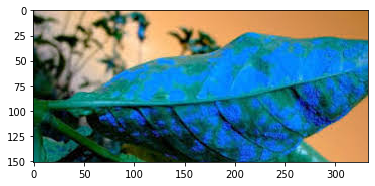

In [ ]:
image = cv2.imread('/content/drive/My Drive/ferrugem_café/Z (4).jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

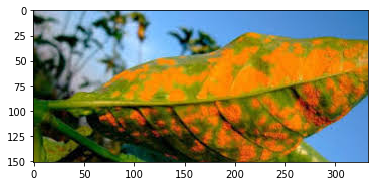

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

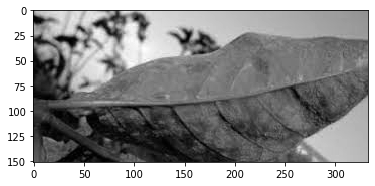

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

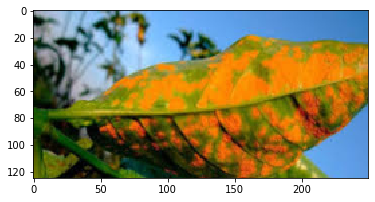

In [ ]:
resized_image = cv2.resize(image,(250, 125))
plt.imshow(resized_image)

In [ ]:
def rgbHex(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
  modified_image = cv2.resize(image, (200, 120), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0] * modified_image.shape[1], 3)

  clf = KMeans(n_clusters= number_of_colors)
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)
  counts = dict(sorted(counts.items()))

  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [rgbHex(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]


  if(show_chart):
    plt.figure(figsize = (8,6))
    plt.pie(counts.values(), labels = hex_colors, colors= hex_colors)
  return  rgb_colors

  
    


[array([234.98385469, 136.18466196,   9.61276488]),
 array([106.70304878, 128.55670732, 125.53658537]),
 array([88.32904017, 83.50199325, 14.55197792]),
 array([ 89.08643933, 151.74676183, 219.69653714]),
 array([150.05367965, 189.33463203, 225.57272727]),
 array([147.28991597, 133.48559424,  17.68847539]),
 array([21.35708753, 36.22024271, 12.40846889]),
 array([183.10778443,  92.16439848,  11.84213391])]

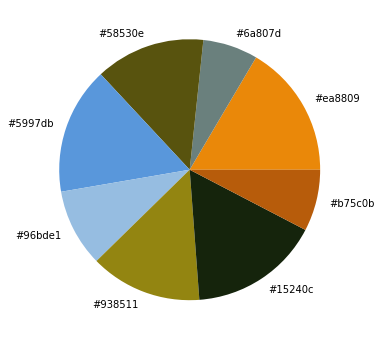

In [ ]:
get_colors(get_image('/content/drive/My Drive/ferrugem_café/Z (4).jpg'), 8, True)

In [ ]:
IMAGE_DIRECTORY = '/content/drive/My Drive/ferrugem_café'
COLORS = {
    'GREEN' : [0, 128, 0],
    'BLUE': [0,0,128],
    'YELLOW' : [255, 255, 0],
    'ORANGE' : [255,127,80]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
  if not file.startswith('.'):
    images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))


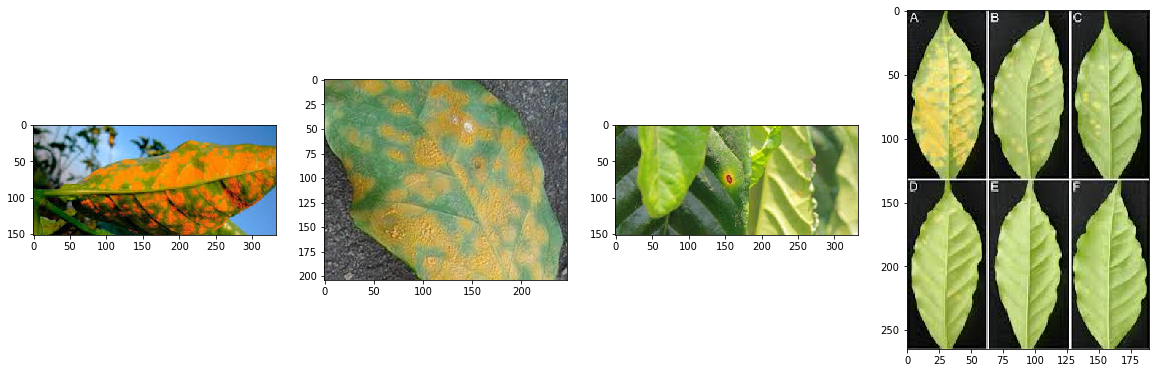

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
  plt.subplot(1, len(images), i + 1)
  plt.imshow(images[i])

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10 ):
  image_colors = get_colors(image, number_of_colors, False)
  selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

  select_image = False
  for i in range(number_of_colors):
    curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
    diff = deltaE_cie76(selected_color, curr_color)
    if(diff < threshold):
      select_image = True
  return select_image

In [ ]:
def show_selected_images(images, color, threshold, colors_to_match):
  index = 1

  for i in range(len(images)):
    selected = match_image_by_color(images[i], color, threshold, colors_to_match)

    if(selected):
      plt.subplot(1, 5, index)
      plt.imshow(images[i])
      index += 1
  if(COLORS['ORANGE'] or COLORS['YELLOW']):
      print('Ferrugem no cafesal')
  else:
      print('Sem ')

Ferrugem no cafesal


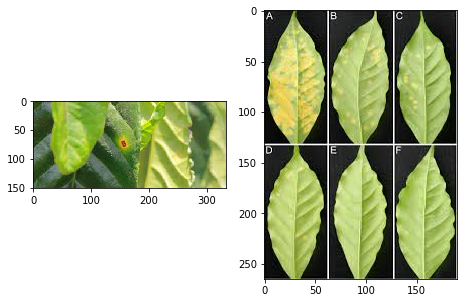

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

Ferrugem no cafesal


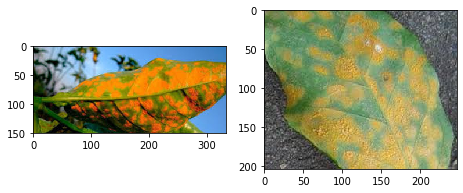

In [ ]:
plt.figure(figsize=(20, 10))
show_selected_images(images, COLORS['ORANGE'], 60, 5)